### Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the preprocessed datasets.

In [2]:
train_file_path = 'preprocessed_train_data.csv'
test_file_path = 'preprocessed_test_data.csv'
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

### Define features and target variable for dataset.

In [3]:
X_train = train_df.drop(['Is high risk', 'Job title'], axis=1)  # Exclude 'Job title' column
y_train = train_df['Is high risk']

X_test = test_df.drop(['Is high risk', 'Job title'], axis=1)  # Exclude 'Job title' column
y_test = test_df['Is high risk']

### Standardize features.

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train and evaluate different models.

C:\Users\Poojitha Sai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Logistic Regression
Accuracy: 0.9840
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.6317


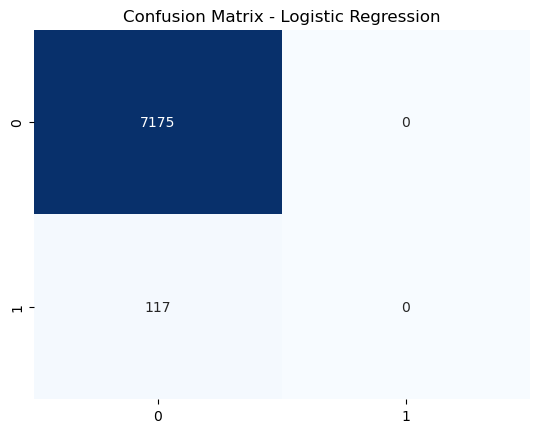

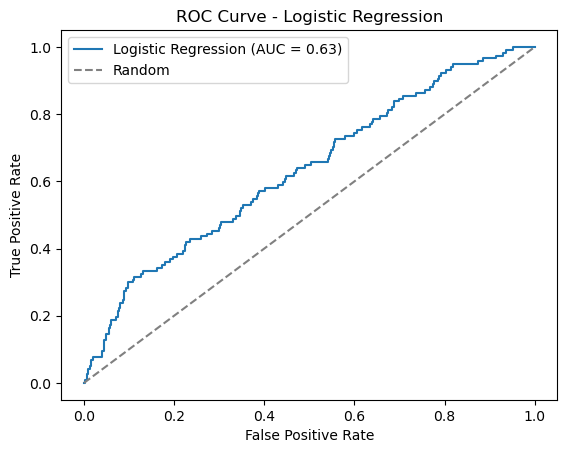


Model: Decision Tree
Accuracy: 0.9693
Precision: 0.1361
Recall: 0.1709
F1 Score: 0.1515
AUC-ROC: 0.5766


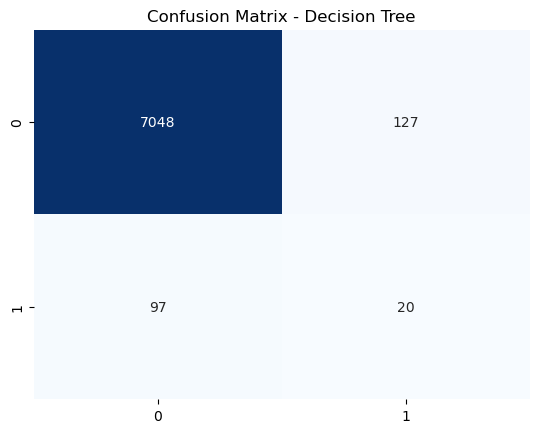

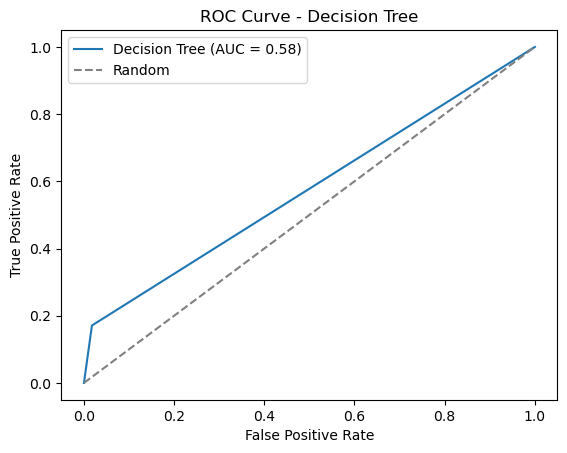


Model: Random Forest
Accuracy: 0.9816
Precision: 0.2571
Recall: 0.0769
F1 Score: 0.1184
AUC-ROC: 0.7233


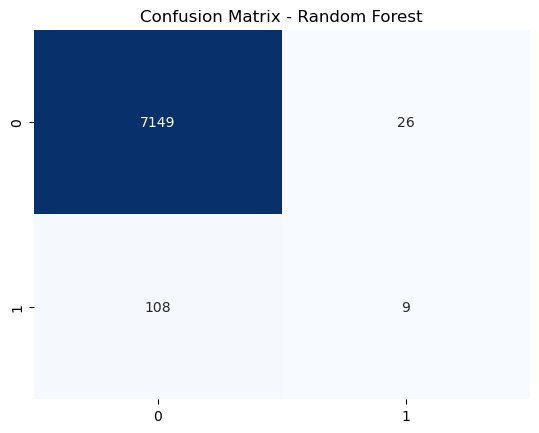

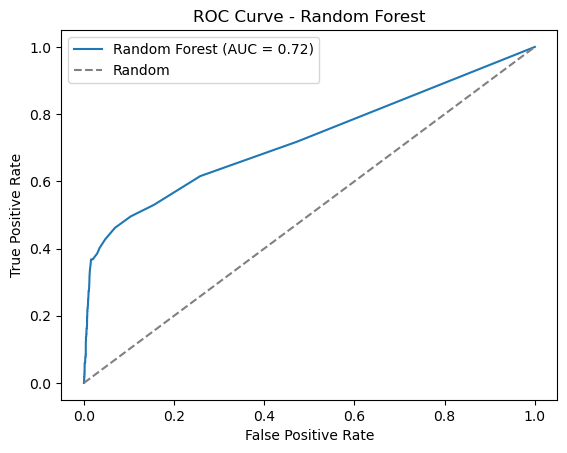


Model: Gradient Boosting
Accuracy: 0.9834
Precision: 0.3571
Recall: 0.0427
F1 Score: 0.0763
AUC-ROC: 0.6871


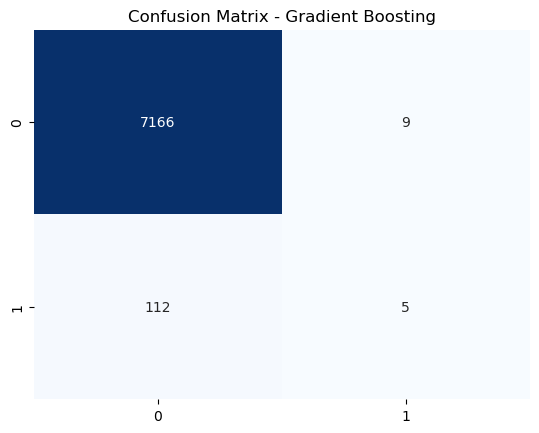

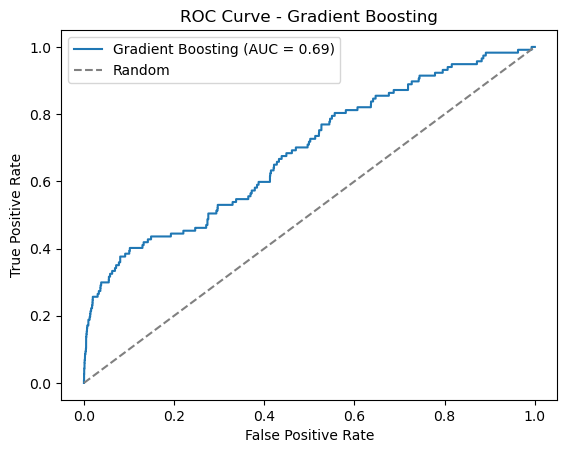

In [5]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    # Display evaluation metrics
    print(f'\nModel: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
